## Text-to-Image Generation using Stable Diffusion and Diffusers



In [7]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [10]:
!pip show torch

Name: torch
Version: 2.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: accelerate


In [11]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

ImportError: 
StableDiffusionPipeline requires the transformers library but it was not found in your environment. You can install it with pip: `pip
install transformers`


In [ ]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

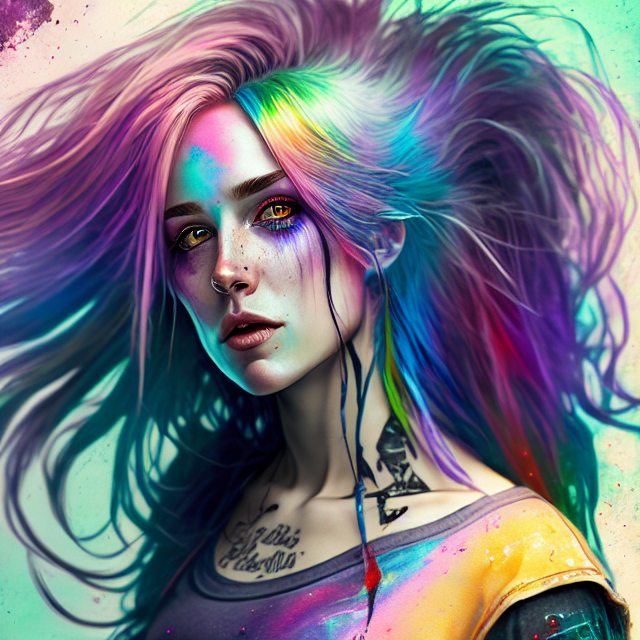

In [ ]:
image

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



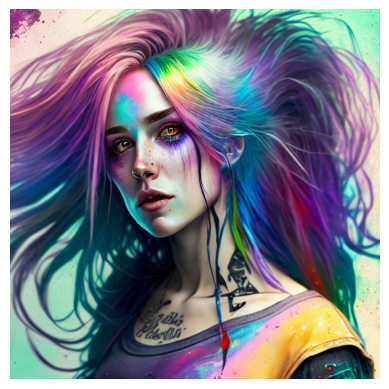

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



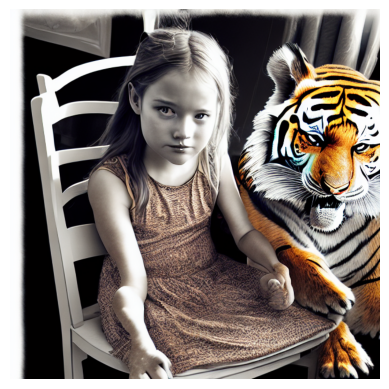

In [ ]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [ ]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

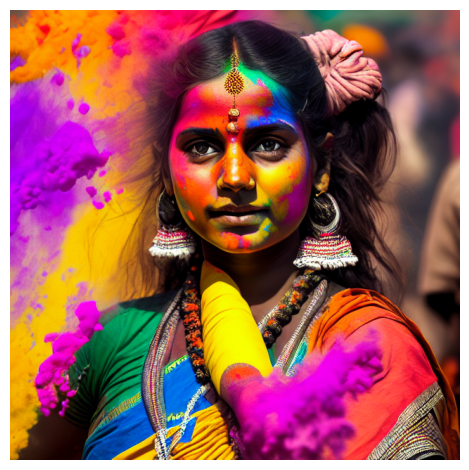

In [ ]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

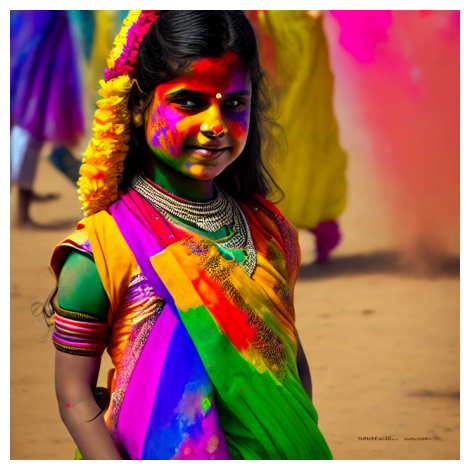

In [ ]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

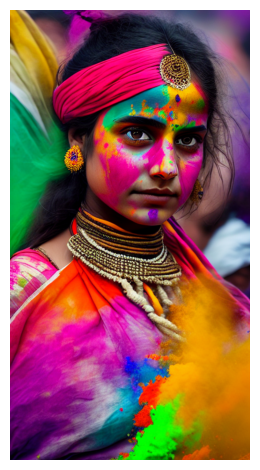

In [ ]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

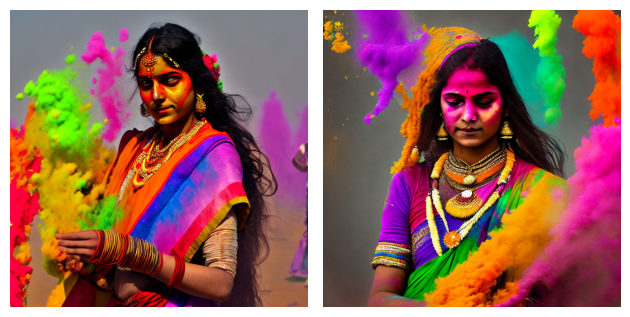

In [ ]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

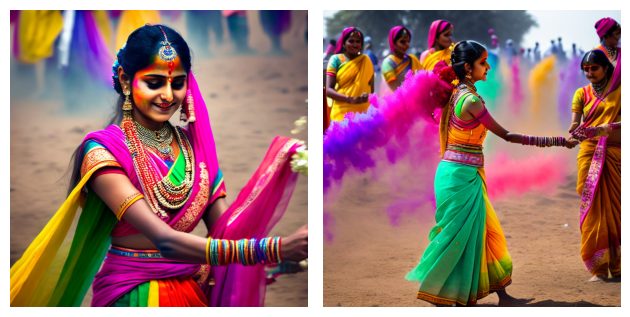

In [ ]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)